<a href="https://colab.research.google.com/github/northpr/tensorflow-resources/blob/main/udemy_tensorflow_course/03_CNN_cv_tensorflowipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-06 15:45:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   330MB/s    in 0.3s    

2022-10-06 15:45:46 (330 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
import matplotlib.pyplot as plt
import random

Image shape: (384, 512, 3)


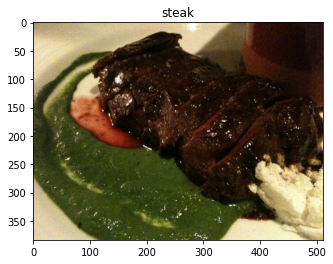

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  img = plt.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)

  print(f"Image shape: {img.shape}")

view_random_image("pizza_steak/train/",
                  "steak")

# Binary Classification

## Data Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)

# train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=40,
#                                  width_shift_range=0.2,height_shift_range=0.2,
#                                  shear_range=0.2,zoom_range=0.2,
#                                  horizontal_flip=True,fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data[0][0].shape

(32, 224, 224, 3)

## Model 1

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, 
                           kernel_size=(3,3),
                           activation="relu", 
                           input_shape=(224,224,3)), # height, width, colour channel
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding="valid"),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # Binary classification output                        
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 30s 273ms/step - loss: 0.7283 - accuracy: 0.5967 - val_loss: 0.5191 - val_accuracy: 0.8020
Epoch 2/10
47/47 [==============================] - 11s 227ms/step - loss: 0.4846 - accuracy: 0.7833 - val_loss: 0.3527 - val_accuracy: 0.8620
Epoch 3/10
47/47 [==============================] - 11s 225ms/step - loss: 0.4002 - accuracy: 0.8240 - val_loss: 0.3204 - val_accuracy: 0.8760
Epoch 4/10
47/47 [==============================] - 11s 223ms/step - loss: 0.3654 - accuracy: 0.8460 - val_loss: 0.3450 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 11s 223ms/step - loss: 0.2699 - accuracy: 0.8947 - val_loss: 0.3516 - val_accuracy: 0.8460
Epoch 6/10
47/47 [==============================] - 11s 225ms/step - loss: 0.2038 - accuracy: 0.9280 - val_loss: 0.4184 - val_accuracy: 0.8320
Epoch 7/10
47/47 [==============================] - 11s 223ms/step - loss: 0.1431 - accuracy: 0.9527 - val_loss: 0.5480 - val_accuracy: 0.8000

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 373248)            0         
                                                                 
 dense (Dense)               (None, 1)                 3

## model 2

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, 
                           kernel_size=(3,3),
                           activation="relu", 
                           input_shape=(224,224,3)), # height, width, colour channel
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding="valid"),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # Binary classification output                        
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 13s 258ms/step - loss: 0.6996 - accuracy: 0.5600 - val_loss: 0.5140 - val_accuracy: 0.7720
Epoch 2/10
47/47 [==============================] - 10s 216ms/step - loss: 0.5099 - accuracy: 0.7580 - val_loss: 0.4140 - val_accuracy: 0.8160
Epoch 3/10
47/47 [==============================] - 10s 216ms/step - loss: 0.4344 - accuracy: 0.8053 - val_loss: 0.3830 - val_accuracy: 0.8440
Epoch 4/10
47/47 [==============================] - 10s 215ms/step - loss: 0.3816 - accuracy: 0.8427 - val_loss: 0.3230 - val_accuracy: 0.8720
Epoch 5/10
47/47 [==============================] - 10s 215ms/step - loss: 0.3446 - accuracy: 0.8553 - val_loss: 0.3440 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 10s 216ms/step - loss: 0.2915 - accuracy: 0.8927 - val_loss: 0.3078 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 10s 216ms/step - loss: 0.2411 - accuracy: 0.9087 - val_loss: 0.3382 - val_accuracy: 0.8480

# Augmented Data

In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen_augmented = ImageDataGenerator(rescale=1/255,rotation_range=40,
                                 width_shift_range=0.2,height_shift_range=0.2,
                                 shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
# Import data from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## model 3

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 25s 518ms/step - loss: 0.6157 - accuracy: 0.6780 - val_loss: 0.3804 - val_accuracy: 0.8260
Epoch 2/10
47/47 [==============================] - 23s 481ms/step - loss: 0.5094 - accuracy: 0.7527 - val_loss: 0.3720 - val_accuracy: 0.8240
Epoch 3/10
47/47 [==============================] - 23s 479ms/step - loss: 0.4996 - accuracy: 0.7640 - val_loss: 0.4013 - val_accuracy: 0.8280
Epoch 4/10
47/47 [==============================] - 22s 476ms/step - loss: 0.4953 - accuracy: 0.7620 - val_loss: 0.3860 - val_accuracy: 0.8620
Epoch 5/10
47/47 [==============================] - 23s 494ms/step - loss: 0.4783 - accuracy: 0.7893 - val_loss: 0.3933 - val_accuracy: 0.8080
Epoch 6/10
47/47 [==============================] - 23s 479ms/step - loss: 0.4734 - accuracy: 0.7900 - val_loss: 0.5187 - val_accuracy: 0.6860
Epoch 7/10
47/47 [==============================] - 23s 483ms/step - loss: 0.4819 - accuracy: 0.7727 - val_loss: 0.3380 - val_accuracy: 0.8620

In [ ]:
# Function to import an image and resize it to able to be used with model.

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from file name turns it into a tensor and reshapes it
  """

  # Read in target file (an image)
  img = tf.io.read_file(filename)
  # Decode the read file and turn into a tensor
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all the values between 0 and 1)
  img =img/255.
  return img

def prep_and_plot(model, filename, class_name):
  # Import the target image and process it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class =class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



In [ ]:
# Load steak image

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2022-10-06 15:53:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-10-06 15:53:57 (248 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



# Multi-class classification

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 


--2022-10-06 15:53:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   222MB/s    in 2.2s    

2022-10-06 15:54:00 (222 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names, type(class_names))

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi'] <class 'numpy.ndarray'>


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,rotation_range=40,
                                 width_shift_range=0.2,height_shift_range=0.2,
                                 shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,fill_mode='nearest')

test_data = ImageDataGenerator(rescale=1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_data.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Model 4

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 481ms/step - loss: 2.2677 - accuracy: 0.1599 - val_loss: 2.1091 - val_accuracy: 0.2300
Epoch 2/5
235/235 [==============================] - 111s 474ms/step - loss: 2.1324 - accuracy: 0.2261 - val_loss: 2.0400 - val_accuracy: 0.2560
Epoch 3/5
235/235 [==============================] - 112s 478ms/step - loss: 2.1073 - accuracy: 0.2492 - val_loss: 2.0365 - val_accuracy: 0.2812
Epoch 4/5
235/235 [==============================] - 111s 473ms/step - loss: 2.0693 - accuracy: 0.2760 - val_loss: 1.9280 - val_accuracy: 0.3316
Epoch 5/5
235/235 [==============================] - 111s 473ms/step - loss: 2.0191 - accuracy: 0.2931 - val_loss: 1.9163 - val_accuracy: 0.3336


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      9232      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

## Random test

In [ ]:
import tensorflow as tf

# Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)

In [ ]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  # preprocessing.Rescaling(1./255) # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="binary",
                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="binary",
                                                                 image_size=IMG_SIZE)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                    callbacks=[checkpoint_callback])

Epoch 1/10
47/47 [==============================] - 30s 615ms/step - loss: 1.7002 - accuracy: 0.5313 - val_loss: 0.7330 - val_accuracy: 0.5820
Epoch 2/10
47/47 [==============================] - 27s 569ms/step - loss: 0.6457 - accuracy: 0.6447 - val_loss: 0.6226 - val_accuracy: 0.6880
Epoch 3/10
47/47 [==============================] - 27s 560ms/step - loss: 0.7634 - accuracy: 0.6107 - val_loss: 0.5612 - val_accuracy: 0.7480
Epoch 4/10
47/47 [==============================] - 28s 596ms/step - loss: 0.7211 - accuracy: 0.6380 - val_loss: 0.9591 - val_accuracy: 0.5400
Epoch 5/10
47/47 [==============================] - 26s 550ms/step - loss: 0.6661 - accuracy: 0.6500 - val_loss: 0.5269 - val_accuracy: 0.7200
Epoch 6/10
47/47 [==============================] - 27s 553ms/step - loss: 0.5883 - accuracy: 0.6893 - val_loss: 0.5480 - val_accuracy: 0.7420
Epoch 7/10
47/47 [==============================] - 24s 514ms/step - loss: 0.5757 - accuracy: 0.6993 - val_loss: 0.6881 - val_accuracy: 0.6140